In [1]:
import os
print(os.getcwd())
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\USER\lg dx python


# Yaml 파일 읽기

In [4]:
import yaml

with open('./data/vegetables.yml') as f:
    # yml 파일에서 데이터를 로드
    vegetables = yaml.load(f, Loader = yaml.FullLoader)
    # 결과 출력
    print(vegetables)

{'Vegetables': ['Pepper', 'Tomato', 'Garlic']}


## MySQL 데이터 가져오기

In [6]:
from sqlalchemy import create_engine
import pymysql

pymysql.install_as_MySQLdb()
import MySQLdb

In [9]:
# 연결
#connect = create_engine('mysql+mysqldb://아이디:비밀번호@IP:PORT/데이터베이스이름')
connect = create_engine('mysql+mysqldb://root:!!@localhost/mysql')

# 테이블에서 데이터 읽어오기
DF = pd.read_sql_table('dbms', connect)
print(DF)

   num         name       vendor description
0    1          오라클       ORACLE      RDBMS1
1    2        MySQL        MySQL      RDBMS2
2    3  Postgre SQL  OPEN SOURCE      RDBMS3


In [11]:
!pip install pymongo

     -------------------------------------- 408.2/408.2 kB 6.3 MB/s eta 0:00:00
  Using cached dnspython-2.4.2-py3-none-any.whl (300 kB)


## MongoDB 연동해서 데이터 가져오기

In [12]:
from pymongo import MongoClient

In [13]:
# mongodb 연결
conn = MongoClient('127.0.0.1')

# 데이터베이스 연결
db = conn.mymongo

# 컬렉션 연결
collec = db.echo

# 데이터 가져오기
# 데이터를 cursor 오브젝트로 가져옴
# cursor 를 활용해서 데이터에 접근
result = collec.find()
print(result)

In [14]:
# 커서를 순회하면서 각 데이터를 list 에 삽입한 후 DataFrame 으로 변환
li = []
for r in result:
    # mongo db 가 자동으로 생성하는 id 제외
    del r['_id']
    li.append(r)
    
echo = pd.DataFrame(li)
print(echo)
    


   num    name function
0    1   mongo     db 1
1    2   MySQL     db 2
2    3  oracle     db 3


In [15]:
!pip install pyreadstat

     ---------------------------------------- 2.4/2.4 MB 5.3 MB/s eta 0:00:00


In [16]:
# import pandas, numpy, and pyreadstat
import pandas as pd
import numpy as np
import pyreadstat

# 데이터 와 메타 데이터 가져오기
# 이 함수는 데이터와 메타 데이터를 튜플로 가져오기 때문에 
# 아래와 같이 데이터를 나눠서 받는게 좋음
nls97spss, metaspss = pyreadstat.read_sav('data/nls97.sav')
print(type(nls97spss))
print(type(metaspss))
print(nls97spss.head())

<class 'pandas.core.frame.DataFrame'>
<class 'pyreadstat._readstat_parser.metadata_container'>
   R0000100  R0536300  R0536401  R0536402  R1235800  R1482600  R9793800  \
0       1.0       2.0       9.0    1981.0       1.0       4.0     350.0   
1       2.0       1.0       7.0    1982.0       1.0       2.0     460.0   
2       3.0       2.0       9.0    1983.0       1.0       2.0       NaN   
3       4.0       2.0       2.0    1981.0       1.0       2.0       NaN   
4       5.0       1.0      10.0    1982.0       1.0       2.0       NaN   

   R9793900  R9871900  R9872000  ...  U1852700  U2166200  U2166300  U2166400  \
0     470.0     309.0     310.0  ...       NaN       NaN       NaN       NaN   
1     440.0     217.0     280.0  ...       NaN       NaN       NaN       NaN   
2       NaN       NaN       NaN  ...       0.0       NaN       NaN       NaN   
3       NaN     253.0     216.0  ...       1.0       NaN       NaN       NaN   
4       NaN     243.0     235.0  ...       0.0       N

## 데이터 탐색
### 선택

In [32]:
# csv 파일을 읽어서 DataFrame 으로 변환
DF = pd.read_csv('./data/item.csv')
#print(DF.head())

# 인덱스 변경 - 인덱스를 DF 의 code 로 지정
#DF.index = DF['code']
DF.index = ['사과', '수박', '참외', '바나나', '레몬', '망고'] #의 형태로 인덱스를 직접 설정할 수도 있음
#print(DF)

# 열 선택
#print(DF['code'])

# 하나의 열을 선택하면 기본적으로 Series
#print(type(DF['code'])) # Series

# 열을 선택할 때 list 를 사용하면 DataFrame
#print(type(DF[['code']])) # DataFrame

# 하나의 행 선택 - 행을 하나 선택하면 series
#print(DF.loc['사과'])
#print(DF.iloc[0])

# 하나의 셀 선택
# 열 이름과 위치 인덱스를 이용해서 셀 선택
print(DF['name'][0]) # apple
# 인덱스와 열 이름을 이용해서 셀 선택
print(DF.loc['수박', 'name']) # watermelon
# 위치 인덱스로만 셀 선택하기
print(DF.iloc[1, 2]) # watermelon




apple
watermelon
watermelon


In [34]:
# 범위 선택 - 사과 부터 참외 까지 데이터 출력
print(DF.loc['사과':'참외', 'name'])
# 인덱스를 사용한 슬라이싱
# 마지막 3번 인덱스는 범위에 포함되지 않음
print(DF.iloc[0:3])

사과             apple
수박        watermelon
참외    oriental melon
Name: name, dtype: object
    code manufacture            name  price
사과     1       korea           apple   1500
수박     2       korea      watermelon  15000
참외     3       korea  oriental melon   1000


In [43]:
# boolean 색인 - price 를 가지고 bool
print(DF[DF['price'] < 1000])
print(DF[(DF['price'] < 1000) & (DF['price'] > 500)])
      
# isin 색인 - list에 있는 항목은 True, 아닌 항목은 False 로 리턴
print(DF['price'].isin([1000, 1500]))

     code  manufacture    name  price
바나나     4  philippines  banana    500
망고      6        korea   mango    700
    code manufacture   name  price
망고     6       korea  mango    700
사과      True
수박     False
참외      True
바나나    False
레몬      True
망고     False
Name: price, dtype: bool


In [54]:
# 헤더가 없는 csv 파일(첫번째 행이 컬럼 이름이 아님)로 첫번째 행이 자동으로 헤더가 됨
# 이를 막기 위해 header 옵션을 사용해야 함
DF = pd.read_csv('./data/noheader_auto-mpg.csv', header = None)

# 데이터를 읽고 난 후 컬럼 이름을 설정
DF.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'name']

# 전체가 아니라 앞의 5개 행만 읽어서 제대로 읽어지는지 확인
#print(DF.head())

# 데이터의 갯수 확인 - 행과 열의 수
#print(DF.shape) # (388, 9)

# 데이터의 전반적인 정보 확인 - 자료형, 열의 수, 행의 수, dtype 등
#print(DF.info())

# 기술 통계 정보 확인 - count, 중간값, 최대, 최소 등
#print(DF.describe())

# 고유한 값의 정보
print(DF['mpg'].nunique()) # 고유한 데이터의 갯수 - 129개
print(DF['mpg'].value_counts()) # 값과 갯수 확인
print(DF['mpg'].unique()) # 고유한 데이터의 값들을 리턴

129
13.0    20
14.0    19
18.0    17
15.0    16
26.0    14
        ..
31.9     1
16.9     1
18.2     1
22.3     1
44.0     1
Name: mpg, Length: 129, dtype: int64
[18.  15.  16.  17.  14.  24.  22.  21.  27.  26.  25.  10.  11.   9.
 28.  19.  12.  13.  23.  30.  31.  35.  20.  29.  32.  33.  17.5 15.5
 14.5 22.5 24.5 18.5 29.5 26.5 16.5 31.5 36.  25.5 33.5 20.5 30.5 21.5
 43.1 36.1 32.8 39.4 19.9 19.4 20.2 19.2 25.1 20.6 20.8 18.6 18.1 17.7
 27.5 27.2 30.9 21.1 23.2 23.8 23.9 20.3 21.6 16.2 19.8 22.3 17.6 18.2
 16.9 31.9 34.1 35.7 27.4 25.4 34.2 34.5 31.8 37.3 28.4 28.8 26.8 41.5
 38.1 32.1 37.2 26.4 24.3 19.1 34.3 29.8 31.3 37.  32.2 46.6 27.9 40.8
 44.3 43.4 36.4 44.6 40.9 33.8 32.7 23.7 23.6 32.4 26.6 25.8 23.5 39.1
 39.  35.1 32.3 37.7 34.7 34.4 29.9 33.7 32.9 31.6 28.1 30.7 24.2 22.4
 34.  38.  44. ]


In [55]:
print(DF.head())

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


In [62]:
# DataFrame 이나 Series 의 메서드 나 함수가 inplace 옵션을 가지고 있으면
# 원본에 작업을 할지 작업을 한 후 리턴을 할지 결정할 수 있음
# inplace 옵션에 False 가 설정되어 있으면 작업을 복사본에 수행하고 결과를 리턴
# 원본에는 영향을 주지 않음

# DF.set_index('name') - 이후 print(DF.head()) 를 해도 결과는 이전과 같음
#print(DF.set_index('name')) # index 가 name 의 값으로 바뀌어서 출력됨

#DF.set_index('name', inplace = True) # index 수정이 원본에 반영됨
print(DF.head())

# 인덱스를 일반 컬럼으로 변경하고 정수의 일련번호로 인덱스를 수정
DF.reset_index(inplace = True)
print(DF.head()) # 인덱스가 다시 숫자가 되었고 데이터에 name 은 없음

                            mpg  cylinders  displacement horsepower  weight  \
name                                                                          
chevrolet chevelle malibu  18.0          8         307.0      130.0  3504.0   
buick skylark 320          15.0          8         350.0      165.0  3693.0   
plymouth satellite         18.0          8         318.0      150.0  3436.0   
amc rebel sst              16.0          8         304.0      150.0  3433.0   
ford torino                17.0          8         302.0      140.0  3449.0   

                           acceleration  model year  origin  
name                                                         
chevrolet chevelle malibu          12.0          70       1  
buick skylark 320                  11.5          70       1  
plymouth satellite                 11.0          70       1  
amc rebel sst                      12.0          70       1  
ford torino                        10.5          70       1  
            

In [63]:
# origin 열을 제거
# 열을 제거하므로 axis 옵션 추가
DF.drop('origin', inplace = True, axis = 1)
print(DF.head()) # origin 열이 사라진 데이터가 출력됨



                        name   mpg  cylinders  displacement horsepower  \
0  chevrolet chevelle malibu  18.0          8         307.0      130.0   
1          buick skylark 320  15.0          8         350.0      165.0   
2         plymouth satellite  18.0          8         318.0      150.0   
3              amc rebel sst  16.0          8         304.0      150.0   
4                ford torino  17.0          8         302.0      140.0   

   weight  acceleration  model year  
0  3504.0          12.0          70  
1  3693.0          11.5          70  
2  3436.0          11.0          70  
3  3433.0          12.0          70  
4  3449.0          10.5          70  


In [64]:
# 행을 제거할 때는 인덱스를 사용

# 0번 행을 제거
DF.drop(0, inplace = True)
# 기존에 있던 0번 인덱스 데이터가 사라지고 1번부터 출력됨
print(DF.head())

                 name   mpg  cylinders  displacement horsepower  weight  \
1   buick skylark 320  15.0          8         350.0      165.0  3693.0   
2  plymouth satellite  18.0          8         318.0      150.0  3436.0   
3       amc rebel sst  16.0          8         304.0      150.0  3433.0   
4         ford torino  17.0          8         302.0      140.0  3449.0   
5    ford galaxie 500  15.0          8         429.0      198.0  4341.0   

   acceleration  model year  
1          11.5          70  
2          11.0          70  
3          12.0          70  
4          10.5          70  
5          10.0          70  


In [66]:
# 데이터 추가 및 수정

# 기존에 없던 color 컬럼이므로 데이터를 추가
# 값을 하나만 입력했으므로 컬럼의 모든 데이터가 skyblue 가 됨
DF['color'] = 'skyblue'

# 기존에 있던 컬럼이므로 데이터를 수정
# 마찬가지로 모든 데이터가 green 이 됨
DF['color'] = 'green'
print(DF.head())

                 name   mpg  cylinders  displacement horsepower  weight  \
1   buick skylark 320  15.0          8         350.0      165.0  3693.0   
2  plymouth satellite  18.0          8         318.0      150.0  3436.0   
3       amc rebel sst  16.0          8         304.0      150.0  3433.0   
4         ford torino  17.0          8         302.0      140.0  3449.0   
5    ford galaxie 500  15.0          8         429.0      198.0  4341.0   

   acceleration  model year  color  
1          11.5          70  green  
2          11.0          70  green  
3          12.0          70  green  
4          10.5          70  green  
5          10.0          70  green  


In [68]:
# 인덱스를 사용해서 하나의 행을 수정
# 값이 하나이므로 행 전체가 5 가 됨
DF.loc[1] = 5
#print(DF.head())

# 하나의 셀을 수정
# 인덱스와 컬럼 이름을 사용
DF.loc[2, 'cylinders'] = 11
print(DF.head())

                 name   mpg  cylinders  displacement horsepower  weight  \
1                   5   5.0          5           5.0          5     5.0   
2  plymouth satellite  18.0         11         318.0      150.0  3436.0   
3       amc rebel sst  16.0          8         304.0      150.0  3433.0   
4         ford torino  17.0          8         302.0      140.0  3449.0   
5    ford galaxie 500  15.0          8         429.0      198.0  4341.0   

   acceleration  model year  color  
1           5.0           5      5  
2          11.0          70  green  
3          12.0          70  green  
4          10.5          70  green  
5          10.0          70  green  


In [70]:
# 행과 열 전치

# T 속성을 사용
#print(DF.T)

# transpose 함수를 사용
print(DF.transpose())

# T 속성을 이용한 것과 결과는 동일
# numpy 에서는 T 와 transpose 의 기능이 다름
# numpy 에는 3차원 이상의 배열이 있을 수 있으므로 transpose 를 이용해서 행과 열의 순서를 지정함
# pandas 에는 2차원 배열까지만 존재하므로 T 와 transpose 가 동일함

              1                   2              3            4    \
name            5  plymouth satellite  amc rebel sst  ford torino   
mpg           5.0                18.0           16.0         17.0   
cylinders       5                  11              8            8   
displacement  5.0               318.0          304.0        302.0   
horsepower      5               150.0          150.0        140.0   
weight        5.0              3436.0         3433.0       3449.0   
acceleration  5.0                11.0           12.0         10.5   
model year      5                  70             70           70   
color           5               green          green        green   

                           5                 6                  7    \
name          ford galaxie 500  chevrolet impala  plymouth fury iii   
mpg                       15.0              14.0               14.0   
cylinders                    8                 8                  8   
displacement             

In [5]:
# 샘플 데이터 생성

# price 컬럼 1개만 갖는 dataframe
# 인덱스를 다르게 설정
item1 = {'1' : {'price' : 1000}, '2' : {'price' : 1400}}
item2 = {'1' : {'price' : 800}, '3' : {'price' : 1700}}
data1 = pd.DataFrame(item1).T
data2 = pd.DataFrame(item2).T
#print(data1)
#print(data2)

# 스칼라 데이터와의 연산은 모든 셀에 적용
#print(data1 + 10) # 1010 과 1410

# DataFrame 이나 Series 끼리의 연산은 동일한 인덱스끼리만 수행
#print(data1 + data2) # index 2, 3 은 NaN

# 함수 이용 - fill_value 옵션을 통해 기본값 설정
print(data1.add(data2, fill_value=0)) # index 2, 3 이 NaN이 아님

    price
1  1800.0
2  1400.0
3  1700.0


In [10]:
# 통계를 적용할 데이터

DF = pd.read_csv('./data/noheader_auto-mpg.csv', header = None)

# 데이터를 읽고 난 후 컬럼 이름을 설정
DF.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'name']

# 전체가 아니라 앞의 5개 행만 읽어서 제대로 읽어지는지 확인
#print(DF.head())

# mpg 의 평균
print(DF['mpg'].mean())

# mpg, cylinders 의 평균 한 번에 구하기
# 리스트로 묶어줌
print(DF[['mpg', 'cylinders']].mean())

# 이전 데이터와의 차이
print(DF[['mpg', 'cylinders']].diff())
print(DF[['mpg', 'cylinders']].pct_change())

23.514572864321607
mpg          23.514573
cylinders     5.454774
dtype: float64
      mpg  cylinders
0     NaN        NaN
1    -3.0        0.0
2     3.0        0.0
3    -2.0        0.0
4     1.0        0.0
..    ...        ...
393   0.0        0.0
394  17.0        0.0
395 -12.0        0.0
396  -4.0        0.0
397   3.0        0.0

[398 rows x 2 columns]
          mpg  cylinders
0         NaN        NaN
1   -0.166667        0.0
2    0.200000        0.0
3   -0.111111        0.0
4    0.062500        0.0
..        ...        ...
393  0.000000        0.0
394  0.629630        0.0
395 -0.272727        0.0
396 -0.125000        0.0
397  0.107143        0.0

[398 rows x 2 columns]


In [13]:
# 모든 숫자 컬럼의 상관 계수를 전부 구하기
# 숫자가 아닌 컬럼은 제외하고 corr(상관계수) 을 계산
DF.corr()

# mpg 와 weight 컬럼만 상관관계 구하기
print(DF[['mpg', 'weight']].corr())

             mpg    weight
mpg     1.000000 -0.831741
weight -0.831741  1.000000


C:\Users\USER\AppData\Local\Temp\ipykernel_6824\705308204.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  DF.corr()


In [19]:
# weight 와 name 순서대로 정렬
# ascending 옵션에 False 를 부여하면 내림차순
print(DF.sort_values(by = ['weight', 'name'], ascending = False))

      mpg  cylinders  displacement horsepower  weight  acceleration  \
44   13.0          8         400.0      175.0  5140.0          12.0   
103  11.0          8         400.0      150.0  4997.0          14.0   
42   12.0          8         383.0      180.0  4955.0          11.5   
90   12.0          8         429.0      198.0  4952.0          11.5   
95   12.0          8         455.0      225.0  4951.0          11.0   
..    ...        ...           ...        ...     ...           ...   
53   31.0          4          71.0      65.00  1773.0          19.0   
345  35.1          4          81.0      60.00  1760.0          16.1   
343  39.1          4          79.0      58.00  1755.0          16.9   
144  31.0          4          76.0      52.00  1649.0          16.5   
54   35.0          4          72.0      69.00  1613.0          18.0   

     model year  origin                      name  
44           71       1       pontiac safari (sw)  
103          73       1          chevrolet 

In [20]:
# 앤스콤의 데이터 가져오기
import seaborn as sns


In [22]:
# 데이터 셋과 x, y 컬럼으로 구성
# 데이터 셋은 4개로 구성
anscombe = sns.load_dataset("anscombe")
print(anscombe)

   dataset     x      y
0        I  10.0   8.04
1        I   8.0   6.95
2        I  13.0   7.58
3        I   9.0   8.81
4        I  11.0   8.33
5        I  14.0   9.96
6        I   6.0   7.24
7        I   4.0   4.26
8        I  12.0  10.84
9        I   7.0   4.82
10       I   5.0   5.68
11      II  10.0   9.14
12      II   8.0   8.14
13      II  13.0   8.74
14      II   9.0   8.77
15      II  11.0   9.26
16      II  14.0   8.10
17      II   6.0   6.13
18      II   4.0   3.10
19      II  12.0   9.13
20      II   7.0   7.26
21      II   5.0   4.74
22     III  10.0   7.46
23     III   8.0   6.77
24     III  13.0  12.74
25     III   9.0   7.11
26     III  11.0   7.81
27     III  14.0   8.84
28     III   6.0   6.08
29     III   4.0   5.39
30     III  12.0   8.15
31     III   7.0   6.42
32     III   5.0   5.73
33      IV   8.0   6.58
34      IV   8.0   5.76
35      IV   8.0   7.71
36      IV   8.0   8.84
37      IV   8.0   8.47
38      IV   8.0   7.04
39      IV   8.0   5.25
40      IV  19.0

In [25]:
# 각각의 기술 통계 확인
# 각 데이터 셋의 대부분은 동일하며 나머지도 거의 유사함
print(anscombe[anscombe['dataset'] == 'I'].describe())
print(anscombe[anscombe['dataset'] == 'II'].describe())
print(anscombe[anscombe['dataset'] == 'III'].describe())
print(anscombe[anscombe['dataset'] == 'IV'].describe())

               x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.031568
min     4.000000   4.260000
25%     6.500000   6.315000
50%     9.000000   7.580000
75%    11.500000   8.570000
max    14.000000  10.840000
               x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.031657
min     4.000000   3.100000
25%     6.500000   6.695000
50%     9.000000   8.140000
75%    11.500000   8.950000
max    14.000000   9.260000
               x          y
count  11.000000  11.000000
mean    9.000000   7.500000
std     3.316625   2.030424
min     4.000000   5.390000
25%     6.500000   6.250000
50%     9.000000   7.110000
75%    11.500000   7.980000
max    14.000000  12.740000
               x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.030579
min     8.000000   5.250000
25%     8.000000   6.170000
50%     8.000000   7.040000
75%     8.000000   8.190000
max    19.000000  12

In [31]:
# dataset 의 값에 따라 데이터 분류
dataset1 = anscombe[anscombe['dataset'] == 'I']
dataset2 = anscombe[anscombe['dataset'] == 'II']
dataset3 = anscombe[anscombe['dataset'] == 'III']
dataset4 = anscombe[anscombe['dataset'] == 'IV']

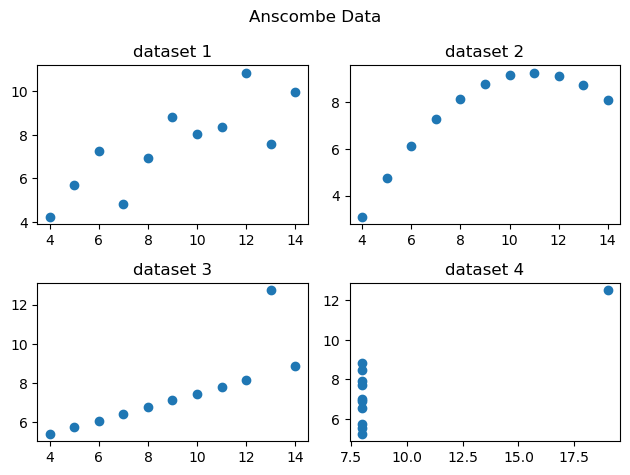

In [32]:
# 시각화를 위한 import
import matplotlib.pyplot as plt

fig = plt.figure()
# 영역을 4개로 분할
# 행의 갯수, 열의 갯수, 각 번호 순서
axes1 = fig.add_subplot(2, 2, 1)
axes2 = fig.add_subplot(2, 2, 2)
axes3 = fig.add_subplot(2, 2, 3)
axes4 = fig.add_subplot(2, 2, 4)

# 각 영역에 그래프를 출력
axes1.plot(dataset1['x'], dataset1['y'], 'o')
axes2.plot(dataset2['x'], dataset2['y'], 'o')
axes3.plot(dataset3['x'], dataset3['y'], 'o')
axes4.plot(dataset4['x'], dataset4['y'], 'o')

# 제목 출력
axes1.set_title('dataset 1')
axes2.set_title('dataset 2')
axes3.set_title('dataset 3')
axes4.set_title('dataset 4')

# 전체 제목 출력
fig.suptitle('Anscombe Data')
fig.tight_layout()

## 서울과 전라남도 사이의 인구 이동에 대한 시각화

In [34]:
# 데이터 읽어오기
DF = pd.read_excel('./data/시도_별_이동자수.xlsx', header = 0)
print(DF)

C:\Users\USER\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


     전출지별     전입지별      1970      1971      1972      1973      1974  \
0    전출지별     전입지별  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)   
1      전국       전국   4046536   4210164   3687938   4860418   5297969   
2     NaN    서울특별시   1742813   1671705   1349333   1831858   2050392   
3     NaN    부산광역시    448577    389797    362202    482061    680984   
4     NaN    대구광역시         -         -         -         -         -   
..    ...      ...       ...       ...       ...       ...       ...   
320   NaN     전라북도       139       202       141       210       219   
321   NaN     전라남도       631       965       857       952      1133   
322   NaN     경상북도       374       619       468       576       625   
323   NaN     경상남도       474       479       440       571      1208   
324   NaN  제주특별자치도      9290     12427     12210     16158     19580   

         1975      1976      1977  ...      2010      2011      2012  \
0    이동자수 (명)  이동자수 (명)  이동자수 (명)  ...  이동자수 (명)  이동자수 (명)  이동자

In [35]:
# 누락된 데이터를 앞의 데이터로 채우기
DF = DF.fillna(method = 'ffill')
print(DF)

        전출지별     전입지별      1970      1971      1972      1973      1974  \
0       전출지별     전입지별  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)   
1         전국       전국   4046536   4210164   3687938   4860418   5297969   
2         전국    서울특별시   1742813   1671705   1349333   1831858   2050392   
3         전국    부산광역시    448577    389797    362202    482061    680984   
4         전국    대구광역시         -         -         -         -         -   
..       ...      ...       ...       ...       ...       ...       ...   
320  제주특별자치도     전라북도       139       202       141       210       219   
321  제주특별자치도     전라남도       631       965       857       952      1133   
322  제주특별자치도     경상북도       374       619       468       576       625   
323  제주특별자치도     경상남도       474       479       440       571      1208   
324  제주특별자치도  제주특별자치도      9290     12427     12210     16158     19580   

         1975      1976      1977  ...      2010      2011      2012  \
0    이동자수 (명)  이동자수 (명)  이동

In [36]:
# 서울에서 다른 곳으로 이동한 데이터만 추출하도록 조건 설정
# 서울을 나갔으면서 서울로 들어오지 않은 인구에 대한 필터 생성
mask = (DF['전출지별'] == '서울특별시') & (DF['전입지별'] != '서울특별시')
DF_seoul = DF[mask]
print(DF_seoul)

     전출지별     전입지별     1970     1971     1972     1973     1974     1975  \
19  서울특별시       전국  1448985  1419016  1210559  1647268  1819660  2937093   
21  서울특별시    부산광역시    11568    11130    11768    16307    22220    27515   
22  서울특별시    대구광역시        -        -        -        -        -        -   
23  서울특별시    인천광역시        -        -        -        -        -        -   
24  서울특별시    광주광역시        -        -        -        -        -        -   
25  서울특별시    대전광역시        -        -        -        -        -        -   
26  서울특별시    울산광역시        -        -        -        -        -        -   
27  서울특별시  세종특별자치시        -        -        -        -        -        -   
28  서울특별시      경기도   130149   150313    93333   143234   149045   253705   
29  서울특별시      강원도     9352    12885    13561    16481    15479    27837   
30  서울특별시     충청북도     6700     9457    10853    12617    11786    21073   
31  서울특별시     충청남도    15954    18943    23406    27139    25509    51205   
32  서울특별시   

In [37]:
# 전출지별 이라는 열을 삭제
DF_seoul.drop(['전출지별'], axis = 1, inplace = True)
print(DF_seoul)

       전입지별     1970     1971     1972     1973     1974     1975     1976  \
19       전국  1448985  1419016  1210559  1647268  1819660  2937093  2495620   
21    부산광역시    11568    11130    11768    16307    22220    27515    23732   
22    대구광역시        -        -        -        -        -        -        -   
23    인천광역시        -        -        -        -        -        -        -   
24    광주광역시        -        -        -        -        -        -        -   
25    대전광역시        -        -        -        -        -        -        -   
26    울산광역시        -        -        -        -        -        -        -   
27  세종특별자치시        -        -        -        -        -        -        -   
28      경기도   130149   150313    93333   143234   149045   253705   202276   
29      강원도     9352    12885    13561    16481    15479    27837    25927   
30     충청북도     6700     9457    10853    12617    11786    21073    18029   
31     충청남도    15954    18943    23406    27139    25509    5120

C:\Users\USER\AppData\Local\Temp\ipykernel_6824\827711147.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_seoul.drop(['전출지별'], axis = 1, inplace = True)


In [38]:
# 전입지별 이라는 컬럼 이름을 전입지 로 변경
DF_seoul.rename({'전입지별' : '전입지'}, axis = 1, inplace = True)
print(DF_seoul)

        전입지     1970     1971     1972     1973     1974     1975     1976  \
19       전국  1448985  1419016  1210559  1647268  1819660  2937093  2495620   
21    부산광역시    11568    11130    11768    16307    22220    27515    23732   
22    대구광역시        -        -        -        -        -        -        -   
23    인천광역시        -        -        -        -        -        -        -   
24    광주광역시        -        -        -        -        -        -        -   
25    대전광역시        -        -        -        -        -        -        -   
26    울산광역시        -        -        -        -        -        -        -   
27  세종특별자치시        -        -        -        -        -        -        -   
28      경기도   130149   150313    93333   143234   149045   253705   202276   
29      강원도     9352    12885    13561    16481    15479    27837    25927   
30     충청북도     6700     9457    10853    12617    11786    21073    18029   
31     충청남도    15954    18943    23406    27139    25509    5120

C:\Users\USER\AppData\Local\Temp\ipykernel_6824\3634773534.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_seoul.rename({'전입지별' : '전입지'}, axis = 1, inplace = True)


In [39]:
# 전입지 컬럼을 index로 설정
DF_seoul.set_index('전입지', inplace = True)
print(DF_seoul)

            1970     1971     1972     1973     1974     1975     1976  \
전입지                                                                      
전국       1448985  1419016  1210559  1647268  1819660  2937093  2495620   
부산광역시      11568    11130    11768    16307    22220    27515    23732   
대구광역시          -        -        -        -        -        -        -   
인천광역시          -        -        -        -        -        -        -   
광주광역시          -        -        -        -        -        -        -   
대전광역시          -        -        -        -        -        -        -   
울산광역시          -        -        -        -        -        -        -   
세종특별자치시        -        -        -        -        -        -        -   
경기도       130149   150313    93333   143234   149045   253705   202276   
강원도         9352    12885    13561    16481    15479    27837    25927   
충청북도        6700     9457    10853    12617    11786    21073    18029   
충청남도       15954    18943    23406    

In [40]:
# index가 전라남도 인 데이터만 추출
jrnd = DF_seoul.loc['전라남도']
print(jrnd)

1970    10513
1971    16755
1972    20157
1973    22160
1974    21314
1975    46610
1976    46251
1977    43430
1978    44624
1979    47934
1980    56251
1981    57645
1982    55408
1983    57737
1984    52779
1985    52629
1986    41082
1987    42667
1988    40695
1989    36188
1990    35589
1991    29925
1992    27258
1993    25554
1994    21737
1995    24100
1996    23790
1997    22773
1998    26176
1999    29161
2000    22969
2001    22457
2002    18179
2003    20432
2004    16529
2005    17049
2006    17329
2007    17717
2008    16601
2009    17468
2010    16429
2011    15974
2012    14765
2013    14187
2014    14591
2015    14598
2016    13065
2017    12426
2018    11209
2019    11334
Name: 전라남도, dtype: object


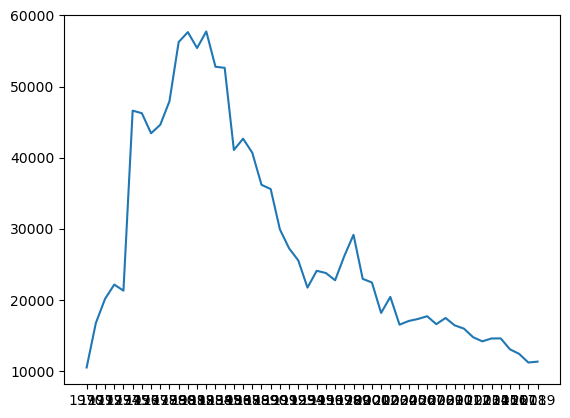

In [41]:
# 선 그래프 그리기
plt.plot(jrnd.index, jrnd.values)

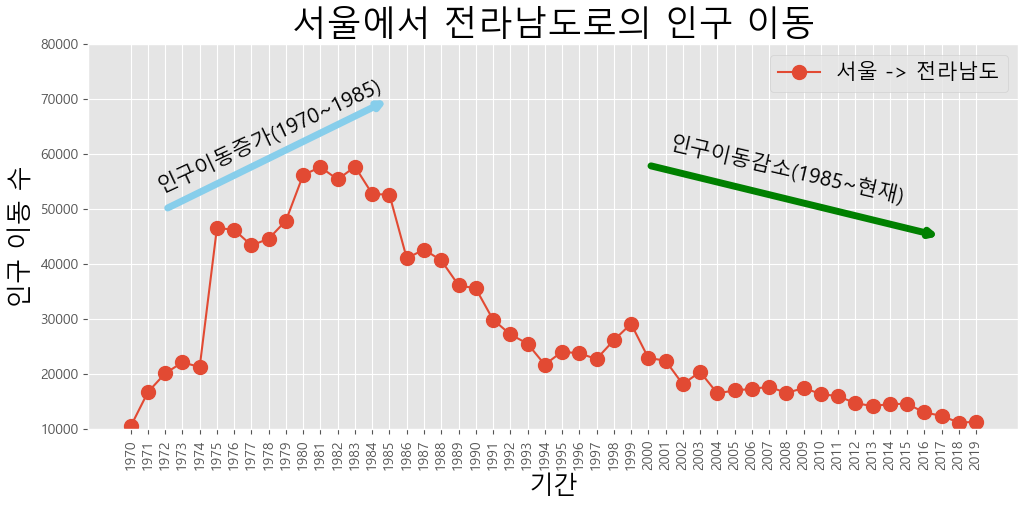

In [68]:
# 한글 출력을 위한 설정
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Darwin':
    # darwin 은 mac
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname = 'c:/Windows/Fonts/malgun.ttf').get_name()
    rc('font', family = font_name)

# 여기까지가 한글을 출력하기 위한 설정
# 별도의 설정을 하지 않으면 한글로 설정한 곳들이 글자가 모두 깨짐
    
# 스타일 지정
plt.style.use('ggplot')
# 크기 설정 - 가로, 세로
plt.figure(figsize = (12,5))

# x 축 눈금을 회전
plt.xticks(size = 10, rotation = 'vertical')

# 그래프를 설정
plt.plot(jrnd.index, jrnd.values, marker = 'o', markersize = 10)

# 제목 설정
plt.title('서울에서 전라남도로의 인구 이동', size = 25)
plt.xlabel('기간', size = 18)
plt.ylabel('인구 이동 수', size = 18)

# 범례 설정
plt.legend(labels = ['서울 -> 전라남도'], loc = 'best', fontsize = 15)

# y축 범위 지정 - 10000 ~ 80000
plt.ylim(10000, 80000)

# 화살표 출력
# 좌표는 끝 위치, 시작 위치 순서
plt.annotate("", xy = (15, 70000), xytext = (2, 50000), xycoords = 'data', arrowprops = dict(arrowstyle = '->', color = 'skyblue', lw = 5))
plt.annotate("", xy = (47, 45000), xytext = (30, 58000), xycoords = 'data', arrowprops = dict(arrowstyle = '->', color = 'green', lw = 5))

# 텍스트 출력 - 화살표 위에 글자를 위치시킴
# 위치는 시작 위치와 기울기를 사용
plt.annotate('인구이동증가(1970~1985)', xy = (8, 53000), rotation = 25, va = 'baseline', ha = 'center', fontsize = 15)
plt.annotate('인구이동감소(1985~현재)', xy = (38, 51000), rotation = -13, va = 'baseline', ha = 'center', fontsize = 15)


plt.show()




In [71]:
# 전라남도에서 서울로 전입한 데이터 가져오기

# 필터 생성
mask = (DF['전출지별'] == '전라남도') & (DF['전입지별'] != '전라남도')
DF_jn = DF[mask]
#print(DF_jn)

# 전출지별 컬럼 없애고 전입지별 컬럼 이름 수정
DF_jn.drop(['전출지별'], axis = 1, inplace = True)
DF_jn.rename({'전입지별' : '전입지'}, axis = 1, inplace = True)
DF_jn.set_index('전입지', inplace = True)

# 전입지(인덱스) 가 서울특별시 인 데이터만 가져오기
sr_data = DF_jn.loc['서울특별시']
print(sr_data)

1970     75871
1971     70920
1972     41044
1973     59763
1974     69361
1975    125081
1976     94332
1977     87967
1978    102247
1979     93911
1980    108902
1981     99493
1982     98804
1983    115465
1984    101745
1985     91110
1986     71265
1987     89924
1988     82769
1989     76407
1990     72856
1991     62796
1992     53855
1993     48984
1994     39337
1995     36069
1996     33520
1997     31291
1998     27762
1999     37648
2000     33517
2001     33062
2002     30672
2003     30501
2004     25478
2005     22988
2006     24534
2007     23129
2008     20442
2009     19007
2010     17766
2011     16298
2012     15818
2013     14595
2014     14607
2015     13884
2016     14568
2017     13665
2018     13915
2019     13894
Name: 서울특별시, dtype: object


C:\Users\USER\AppData\Local\Temp\ipykernel_6824\2605483170.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_jn.drop(['전출지별'], axis = 1, inplace = True)
C:\Users\USER\AppData\Local\Temp\ipykernel_6824\2605483170.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_jn.rename({'전입지별' : '전입지'}, axis = 1, inplace = True)


C:\Users\USER\AppData\Local\Temp\ipykernel_6824\3499033834.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(jrnd.index, rotation = 75)
C:\Users\USER\AppData\Local\Temp\ipykernel_6824\3499033834.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(sr_data.index, rotation = 75)


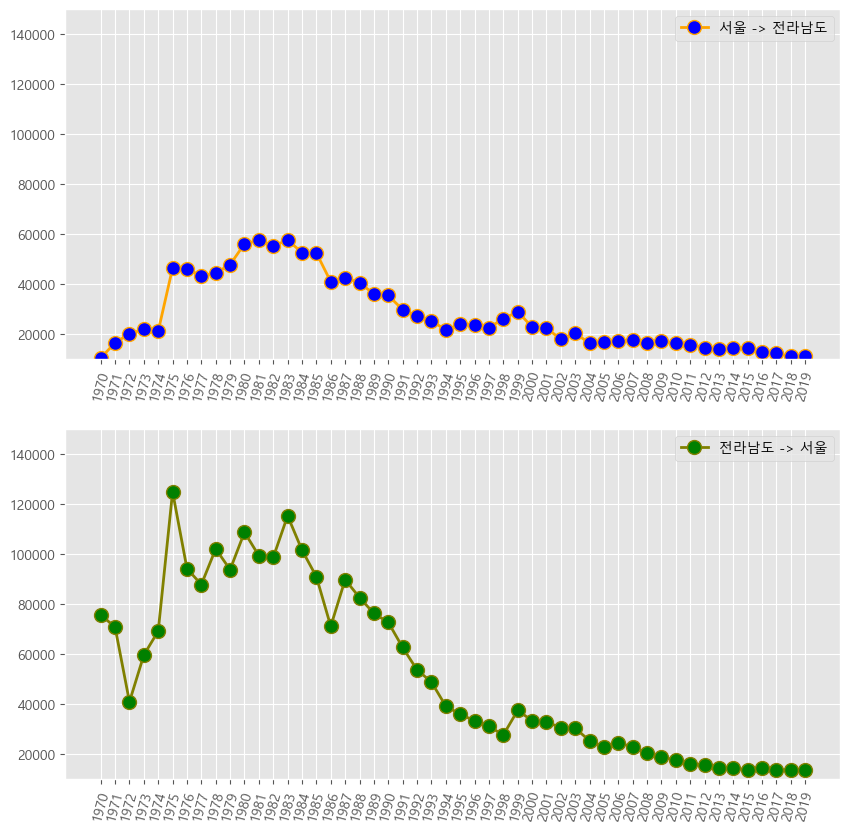

In [76]:
# 2개의 그래프 그리기
fig = plt.figure(figsize = (10, 10))

# 영역 생성
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

ax1.plot(jrnd, marker = 'o', markerfacecolor = 'blue', markersize = 10, color = 'orange', linewidth = 2, label = '서울 -> 전라남도')
ax2.plot(sr_data, marker = 'o', markerfacecolor = 'green', markersize = 10, color = 'olive', linewidth = 2, label = '전라남도 -> 서울')

ax1.legend(loc = 'best')
ax2.legend(loc = 'best')

ax1.set_ylim(10000, 150000)
ax2.set_ylim(10000, 150000)

ax1.set_xticklabels(jrnd.index, rotation = 75)
ax2.set_xticklabels(sr_data.index, rotation = 75)

plt.show()

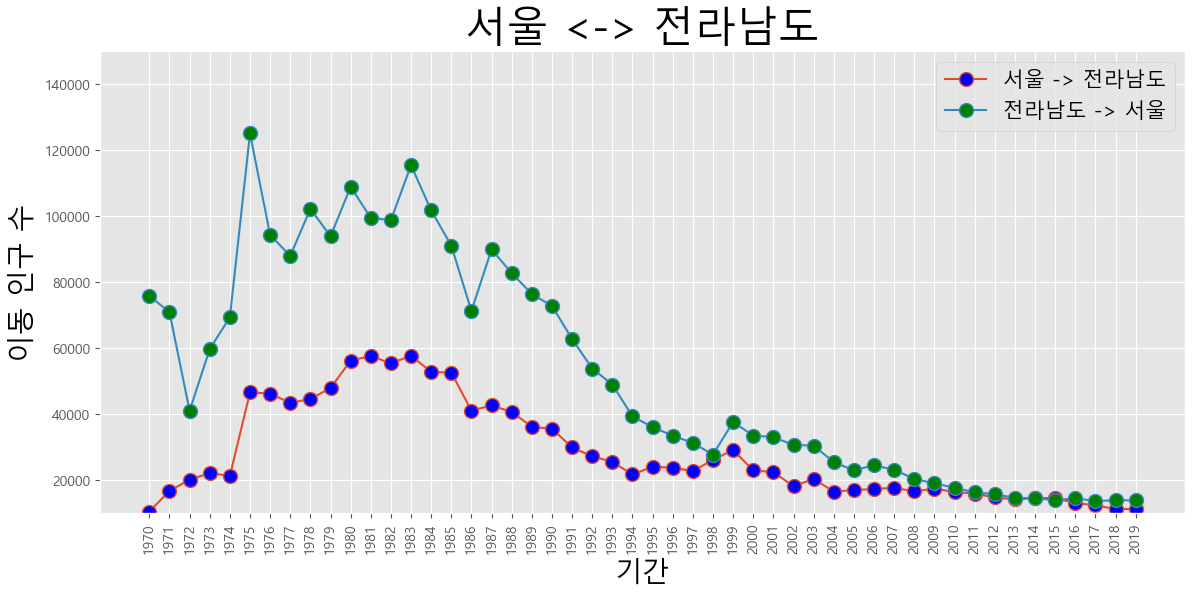

In [78]:
# 2개의 데이터를 하나의 영역 위에 표시 - 같은 plt 위에 계속 그리면 됨
plt.figure(figsize = (14, 6))
plt.xticks(size = 10, rotation = 'vertical')
# index 는 x 축에, values 는 y 축에 표시
plt.plot(jrnd.index, jrnd.values, marker = 'o', markersize = 10, markerfacecolor = 'blue', label = '서울 -> 전라남도' )
plt.plot(sr_data.index, sr_data.values, marker = 'o', markersize = 10, markerfacecolor = 'green', label = '전라남도 -> 서울' )

# 제목 설정
plt.title('서울 <-> 전라남도', size = 30)
plt.xlabel('기간', size = 20)
plt.ylabel('이동 인구 수', size = 20)
plt.legend(loc = 'best', fontsize = 15)
plt.ylim(10000, 150000)
plt.xticks(size = 10, rotation = 'vertical')
plt.show()


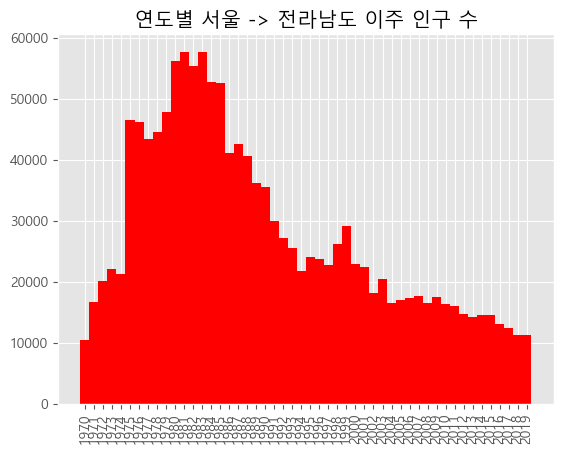

In [80]:
# 막대 그래프 출력
plt.bar(jrnd.index, jrnd, width = 1.0, color = 'r')
plt.xticks(range(0, len(jrnd.index), 1), jrnd.index, rotation = 'vertical')

plt.title('연도별 서울 -> 전라남도 이주 인구 수')
plt.show()

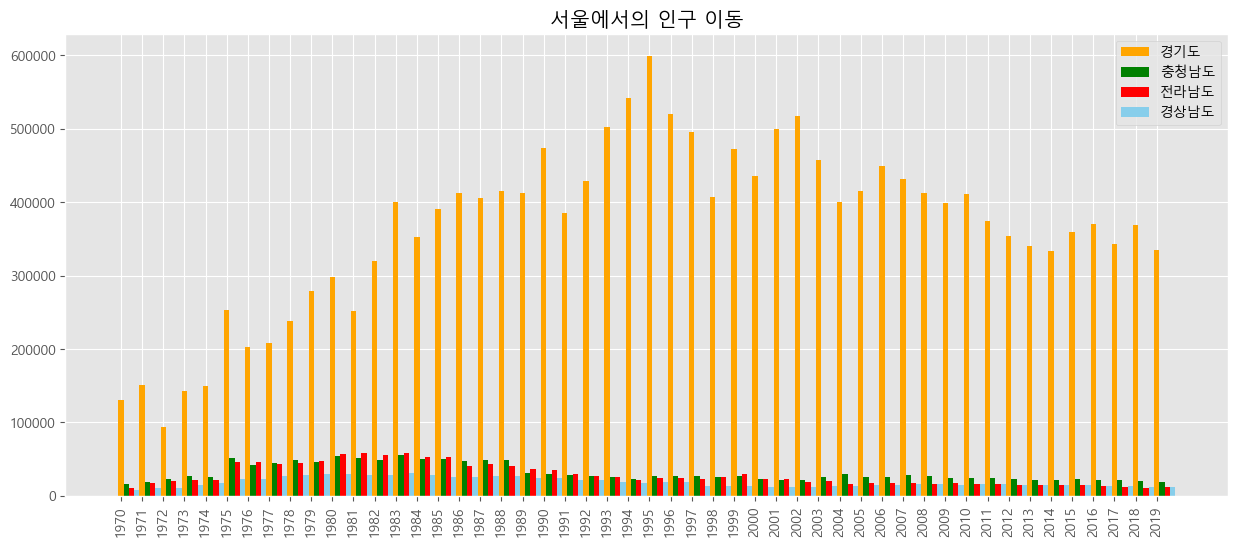

In [86]:
# 서울에서 경기도, 충청남도, 전라남도, 경상남도 로 이주한 인구 수 표현
sr = DF_seoul.loc[['경기도', '충청남도', '전라남도', '경상남도']]
# 행과 열 전치
sr = sr.transpose()
#print(sr)

# index 의 자료형을 정수로 변환 - 계산에 사용하기 위해서
# 눈에 보이는 변화는 없음
sr.index = sr.index.map(int)
#print(sr)

plt.figure(figsize = (15, 6))
x = pd.RangeIndex(0, len(sr.index), 1)

# x 위치를 약간씩 다르게 해서 겹치지 않도록
# 나중에 그린 그래프가 덮어 씌우게 됨
plt.bar(x, sr['경기도'], width = 0.25, color = 'orange', label = '경기도')
plt.bar(x + 0.25, sr['충청남도'], width = 0.25, color = 'green', label = '충청남도')
plt.bar(x + 0.5, sr['전라남도'], width = 0.25, color = 'red', label = '전라남도')
plt.bar(x + 0.75, sr['경상남도'], width = 0.25, color = 'skyblue', label = '경상남도')

plt.xticks(range(0, len(jrnd.index), 1), jrnd.index, rotation = 'vertical')
plt.title('서울에서의 인구 이동')

# 범례 설정 - 각 색이 무엇을 나타내는지
plt.legend()

plt.show()